# **HW1** - Ayberk Kutlu - 22102385

# **Item-1**
## Numpy Exercise

## Objective:
Compare numpy standard deviation to the estimators on your sheet from first 
lecture

## Steps:
1. Create an array with 100 numbers
2. Compute standard deviation using numpy
3. Implement standard deviation from equation sheet yourself
4. Evaluate and compare!

## Formula:
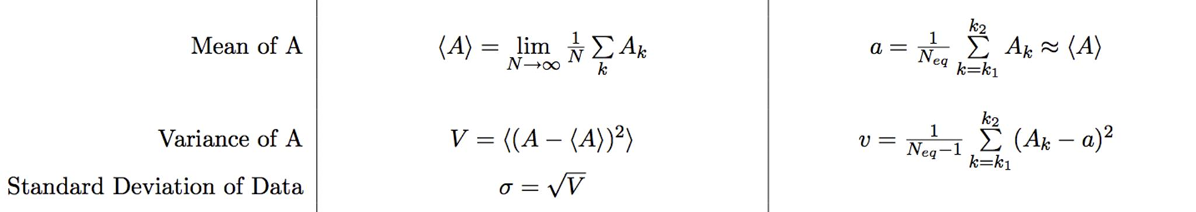


In [3]:
import numpy as np

ModuleNotFoundError: No module named 'numpy'

In [ ]:
#Creating array with 100 random numbers
data = np.random.randint(1, 101, size=100)
data

array([ 61,  28,  60, 100,  40,  52,  75,  26,  60,  58,  12,   6,  50,
        64,  31,  63,  66,  18,  78,   2,  36,  35,  83,  96,  70,  15,
        45,  15,  28,  43,  80,  52,  93,  74,  91,  83,  55,  89,  79,
        42,  35,  97,  85,  55,  33,  97,  88,  91,  91,  47,  62,  94,
        83,  53,  43,  11,  26,  57,  80,  42,  12,  86,  16,  65,  65,
        14,  25,  56,  84,  56,   5,  44,  40,   4,  50,  25,  71,  57,
        16,  79,  47,  74,  18,  22,  51,   8,  43,  17,  61,  73,  95,
        21,  71,  69,  15,  16,  31,  98,  11,  95], dtype=int32)

In [ ]:
#Computing standard deviation using numpy
std= np.std(data)
std

np.float64(28.040506414827817)

In [ ]:
#Implementing standard deviation from equation sheet

In [ ]:
sum= np.sum(data)
mean= sum/len(data)
variance= np.sum((data-mean)**2)/ (len(data)-1)
std_data= variance ** (1/2)
std_data

np.float64(28.181769305920472)

In [ ]:
from IPython.display import Markdown
Markdown(f"**Results** <br> numpy standard deviation -> **{std:.3f}**<br> estimators on our sheet -> **{std_data:.3f}**")

**Results** <br> numpy standard deviation -> **28.041**<br> estimators on our sheet -> **28.182**

# **Item-2**
### Objective:
 * Bin your data for different distributions of random numbers
### Steps:
 * Create arrays with 10k random numbers from different distributions (e.g. 
uniform, normal)
 * Bin this data (do not use already existing functions in the libraries)
 * Compare

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Creating data with different distributions

data_uniform = np.random.uniform(0, 1, size=10000)

# Normal distribution: mean=0.5, std=1/6  -> fits 3σ into [0,1]
data_normal = np.random.normal(0.5, 1/6, size=10000)
data_normal = data_normal[(data_normal >= 0) & (data_normal <= 1)]  # keep only values in [0,1]

# Exponential distribution (scale=0.2) -> compressed into [0,1]
data_exp = np.random.exponential(0.2, size=10000)
data_exp = data_exp[(data_exp >= 0) & (data_exp <= 1)]

In [ ]:
#Manual Binning 
bins = 20
min_val = 0
max_val = 1
bin_width = (max_val - min_val) / bins
edges = np.linspace(min_val, max_val, bins+1)

def manual_binning(data, bins, min_val=0, max_val=1):
    counts = [0] * bins
    bin_width = (max_val - min_val) / bins
    for value in data:
        if min_val <= value < max_val:   # only values inside [0,1)
            index = int((value - min_val) / bin_width)
            if index == bins:   # if value == max_val
                index = bins - 1
            counts[index] += 1
    return counts

uniform_counts = manual_binning(data_uniform, bins)
normal_counts = manual_binning(data_normal, bins)
exponential_counts = manual_binning(data_exp, bins)

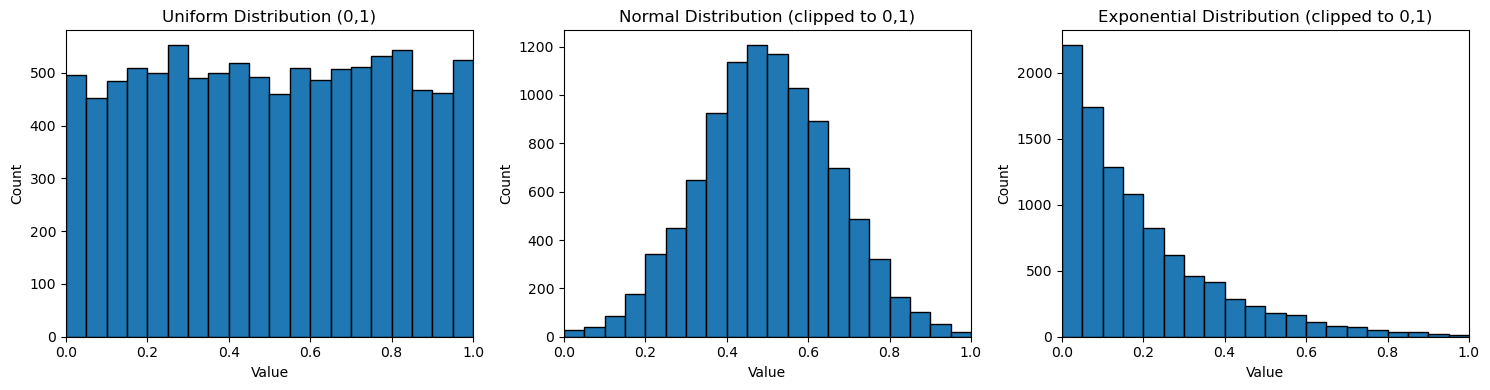

In [ ]:
plt.figure(figsize=(15, 4))

# Uniform
plt.subplot(1, 3, 1)
plt.bar(edges[:-1], uniform_counts, width=bin_width, align="edge", edgecolor="black")
plt.title("Uniform Distribution (0,1)")
plt.xlabel("Value")
plt.ylabel("Count")
plt.xlim(0, 1)

# Normal
plt.subplot(1, 3, 2)
plt.bar(edges[:-1], normal_counts, width=bin_width, align="edge", edgecolor="black")
plt.title("Normal Distribution (clipped to 0,1)")
plt.xlabel("Value")
plt.ylabel("Count")
plt.xlim(0, 1)

# Exponential
plt.subplot(1, 3, 3)
plt.bar(edges[:-1], exponential_counts, width=bin_width, align="edge", edgecolor="black")
plt.title("Exponential Distribution (clipped to 0,1)")
plt.xlabel("Value")
plt.ylabel("Count")
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

# **Item-3**

### Objective:
 * Write a function that computes root mean squared error
### Steps:
 * Write the function
 * Test it (compare against existing numpy function)
 * Compare it to numpy function for your splitted data set (relative to mean value 
of each split)

In [ ]:
# Funciton for calculating RMSE
def rmse(data, prediction):
    n= len(data)
    total= 0
    for i in range(n):
        difference= ((data[i]-prediction[i])**2 )/ n
        total += difference
    RMSE=total**0.5
    return RMSE

In [ ]:
# Testing our function against numpy functions
import numpy as np
data = np.array([1.0, 2.0, 3.0, 4.0])
prediction = np.array([1.1, 1.9, 3.2, 3.8])

rmse_manual= rmse(data,prediction)
rmse_numpy = np.sqrt(np.mean((data - prediction)**2))

print("Manual RMSE:", rmse_manual)
print("NumPy RMSE:", rmse_numpy)

Manual RMSE: 0.1581138830084191
NumPy RMSE: 0.1581138830084191


In [ ]:
# Compare on a split dataset
data= np.random.normal(0.5, 1/6, 10000)
np.random.shuffle(data)
splits = np.array_split(data, 5)

split_index = 1
for split in splits:
    # Predict using mean of each split
    mean_val = np.mean(split)
    predictions = np.array([mean_val] * len(split))

    # Calculate RMSE manually
    rmse_split = rmse(split, predictions)
    
    # Calculate RMSE using NumPy
    rmse_np = np.sqrt(np.mean((split - predictions)**2))
    
    # Print results
    print(f"\nSplit {split_index}:")
    print("  Manual RMSE:", rmse_split)
    print("  NumPy RMSE:", rmse_np)
    
    # Increment counter
    split_index += 1



Split 1:
  Manual RMSE: 0.16793835429929355
  NumPy RMSE: 0.16793835429929352

Split 2:
  Manual RMSE: 0.1659398722031416
  NumPy RMSE: 0.16593987220314155

Split 3:
  Manual RMSE: 0.16456293825758256
  NumPy RMSE: 0.16456293825758267

Split 4:
  Manual RMSE: 0.16334013405323095
  NumPy RMSE: 0.1633401340532309

Split 5:
  Manual RMSE: 0.1696691924374942
  NumPy RMSE: 0.1696691924374941


# **Item-4**

## Data Collection Exercise

### Objective:
 * Collect a bit of real data that you would need/want to solve a specific problem (e.g. related to your research)
### Steps:
* What feature data do you have/need?
* What target data do you have/need?
* Where does the data come from?
* What cleanup is needed?
* What metadata do you have/need?
* Establish version control for your data
* What problems/obstacles/questions do you notice?

# **Item-5**

## Data Exploration Exercise

### Objective:
 * Determine what you want to use as descriptors for linear regression of the Fatigue data
### Steps:
 * Download and open the Fatigue data set:
 https://www.kaggle.com/datasets/chaozhuang/steel-fatigue-strength-prediction
 * Look at distributions of different descriptors
 * Describe (in words) what you notice

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns   

ModuleNotFoundError: No module named 'seaborn'